In [ ]:
#That we written with the Master CSA :)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [18]:
df = pd.read_csv("/home/grj/temp/Social_Network_Ads.csv")
df.head()

400


In [45]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [60]:
#let split randomly into Train and Test
df = pd.read_csv("/home/grj/temp/Social_Network_Ads.csv")
df.head()
df = shuffle(df)
df_train, df_test = df[:350], df[350:]

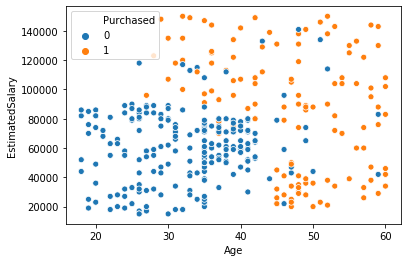

In [61]:
colors = ["r" if p == 1 else "b" for p in df["Purchased"]]
sns.scatterplot(x="Age", y="EstimatedSalary", data=df_train, hue="Purchased")

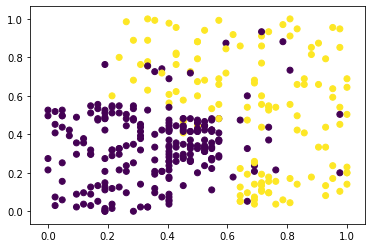

In [69]:
Purchased = df_train.Purchased
Age = df_train.Age
Age = [(a-min(Age))/(max(Age)-min(Age)) for a in Age]
Salary = df_train.EstimatedSalary
Salary = [(a-min(Salary))/(max(Salary)-min(Salary)) for a in Salary]
plt.scatter(Age, Salary, c=Purchased)

In [87]:
b = np.random.normal(size=1) # that's the bias
print("b:", b)
W = np.random.normal(size=2) # that's the weights
print("W:", W)

X = [ [a, s ] for a,s in zip(Age, Salary)]
C = [ p for p in Purchased]
print(X[0], C[0])

b: [-0.66007768]
W: [-1.10528157 -1.13622378]
[0.16666666666666666, 0.5555555555555556] 0


In [72]:
# definition of the non-linear heaviside function
def heaviside(x):
    return 1 if x>=0 else 0

In [84]:
nb_error = 0
for x, c in zip(X, C):
    y = heaviside( np.dot(x, W) + b )
    nb_error += (y-c)**2

print(nb_error, nb_error/len(X))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [85]:
for x, c in zip(X, C):
    y = heaviside( np.dot(x, W) + b )
    e = c-y
    W += e*np.array(x)
    b += e
    


In [86]:
nb_error = 0
for x, c in zip(X, C):
    y = heaviside( np.dot(x, W) + b )
    nb_error += (y-c)**2

print(nb_error, nb_error/len(X))

60 0.17142857142857143


0 77 0.22
1 57 0.16285714285714287
2 57 0.16285714285714287
3 69 0.19714285714285715
4 60 0.17142857142857143
5 61 0.1742857142857143
6 56 0.16
7 55 0.15714285714285714
8 59 0.16857142857142857
9 57 0.16285714285714287
10 57 0.16285714285714287
11 67 0.19142857142857142
12 58 0.1657142857142857
13 57 0.16285714285714287
14 67 0.19142857142857142
15 58 0.1657142857142857
16 59 0.16857142857142857
17 60 0.17142857142857143
18 60 0.17142857142857143
19 55 0.15714285714285714
20 59 0.16857142857142857
21 60 0.17142857142857143
22 60 0.17142857142857143
23 51 0.1457142857142857
24 56 0.16
25 53 0.15142857142857144
26 57 0.16285714285714287
27 77 0.22
28 58 0.1657142857142857
29 58 0.1657142857142857
30 59 0.16857142857142857
31 52 0.14857142857142858
32 54 0.15428571428571428
33 52 0.14857142857142858
34 61 0.1742857142857143
35 56 0.16
36 76 0.21714285714285714
37 77 0.22
38 53 0.15142857142857144
39 58 0.1657142857142857
40 59 0.16857142857142857
41 60 0.17142857142857143
42 57 0.16285714

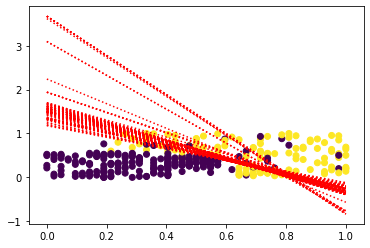

In [93]:
plt.scatter(Age, Salary, c=Purchased)

n_epoch = 100
for i in range(n_epoch):
    for x, c in zip(X, C):
        y = heaviside( np.dot(x, W) + b )
        e = c-y
        W += e*np.array(x)
        b += e
    nb_error = 0
    a = np.linspace(0,1, 100)
    line = ((-b/W[1])/(b/W[0]) )*a+(-b/W[1])
    plt.plot(a, line, 'r:')
    for x, c in zip(X, C):
        y = heaviside( np.dot(x, W) + b )
        nb_error += (y-c)**2

    print(i, nb_error, nb_error/len(X))
plt.show()


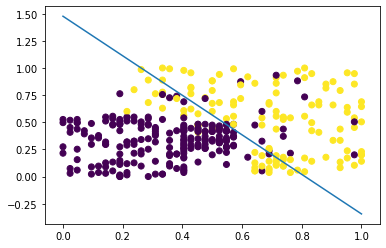

In [94]:
a = np.linspace(0,1, 100)
line = ((-b/W[1])/(b/W[0]) )*a+(-b/W[1])
plt.plot(a, line)
plt.scatter(Age, Salary, c=Purchased)
plt.show()

In [105]:
# my 1-layer neural network
## I want 2 neurons
n_neurons = 2 
## generate the weights and bias that will digest our inputs
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)
print("W_in: \n", W_in)
print("b_in: \n", b_in)
## generate the weights and bias that will spit the output 
W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)
print("W_out: \n", W_out)
print("b_out: \n", b_out)

W_in: 
 [[0.63755855 0.76869614]
 [0.35579107 0.03345023]]
b_in: 
 [0.7595062  0.95323376]
W_out: 
 [[0.84050117]
 [0.59385329]]
b_out: 
 [0.59020772]


In [106]:
def sigmoid(x, derivative=False):
    y = 1/(1+np.exp(-x))
    if derivative == True:
        return y * (1-y)
    return y

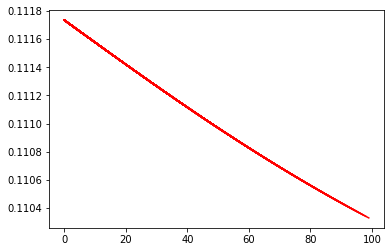

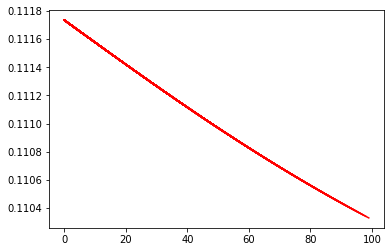

In [108]:
from IPython.display import display, clear_output

# An important step here : 
## We normalize the data : (x-µ)/s
## normalization will always help the algorithm to learn 
X_norm = X

learning_rate = 1
n_epoch = 100
l_epoch = []

# to plot the error
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for e in range(n_epoch):
    error_rate = 0
    for n in range(len(X)):
        x = X_norm[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l_in = np.dot(x, W_in)+b_in
        ## and compute their activation 
        h = sigmoid(l_in) 
        # we compute the output s of the last layer
        l_out = np.dot(h, W_out)+b_out
        ## and the activation of the output neuron (out output y)
        y = sigmoid(l_out)
        # we compute the error
        error = C[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        W_out += learning_rate * np.dot(h.T, y_delta)
        b_out += learning_rate * y_delta.squeeze()
        W_in += learning_rate * np.dot(x.T, h_delta)
        b_in += learning_rate * h_delta.squeeze()
        
    l_epoch.append(error_rate.squeeze()/len(X))
    clear_output(wait = True)
    #plt.pause(0.5)
    ax.plot(range(e+1), l_epoch, c="r")
    display(fig)

    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

[0.225, 0.32061068702290074] 0 50


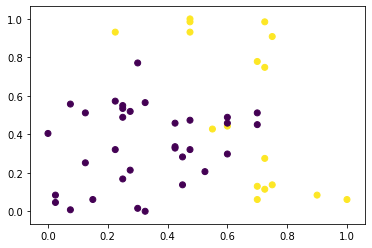

In [132]:
Purchased_test = df_test.Purchased
Age_test = df_test.Age
Age_test = [(a-min(Age_test))/(max(Age_test)-min(Age_test)) for a in Age_test]
Salary_test = df_test.EstimatedSalary
Salary_test = [(a-min(Salary_test))/(max(Salary_test)-min(Salary_test)) for a in Salary_test]
plt.scatter(Age_test, Salary_test, c=Purchased_test)

X_test = [ [a, s ] for a,s in zip(Age_test, Salary_test)]
C_test = [ p for p in Purchased_test]
print(X_test[0], C_test[0], len(X_test))

In [134]:

all_errors = []
for threshold in np.arange(0,1, 0.01):
    Y_test=[]
    for x in X_test:
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l_in = np.dot(x, W_in)+b_in
        ## and compute their activation 
        h = sigmoid(l_in) 
        # we compute the output s of the last layer
        l_out = np.dot(h, W_out)+b_out
        ## and the activation of the output neuron (out output y)
        y = sigmoid(l_out)
    
        if y >= threshold:
            Y_test.append(1)
        else:
            Y_test.append(0)
    all_errors.append(sum( [abs(c-y) for c, y in zip(C_test,Y_test)] ))

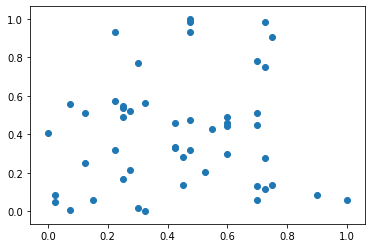

In [135]:
plt.scatter(Age_test, Salary_test)


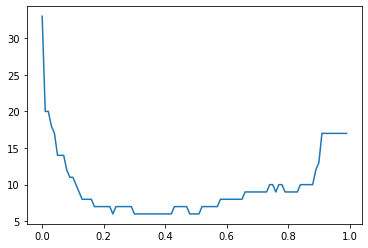

In [139]:
plt.plot(np.arange(0,1, 0.01), all_errors)

In [146]:
def purchase_estimation_model(age, salary, threshold=0.5):
    Age = df.Age
    Salary = df.EstimatedSalary
    #age = (age-mean(Age)) / stdev(Age)
    age = (age-min(Age))/(max(Age)-min(Age))
    salary = (salary-min(Salary))/(max(Salary)-min(Salary))

    x = np.array([age, salary])
    x = np.expand_dims(x, axis=0) # a little trick here
    l_in = np.dot(x, W_in)+b_in
    h = sigmoid(l_in) 
    l_out = np.dot(h, W_out)+b_out
    y = sigmoid(l_out)
    
    if y >= threshold:
        return 1
    else:
        return 0

In [148]:
purchase_estimation_model(100, 12)

1

In [149]:
Age = df.Age
Salary = df.EstimatedSalary

In [172]:
h_age = np.histogram(Age, bins=10)
h_salary = np.histogram(Salary, bins=10)
S = np.array(h_salary[1][:-1])*np.array(h_salary[0]) / sum(np.array(h_salary[1][:-1]))
A = np.array(h_age[1][:-1])*np.array(h_age[0]) / sum(np.array(h_age[1][:-1]))
print(np.array(h_age[1][:-1])*np.array(h_age[0]), np.array(h_salary[1][:-1])*np.array(h_salary[0]))

[ 504.   821.4 1214.4 1071.  2679.6 2535.  1512.  1469.4  928.8 1562.4] [ 765000. 1111500. 2436000. 2775000. 5658000. 3300000. 2112000. 2080500.
 2091000. 3003000.]


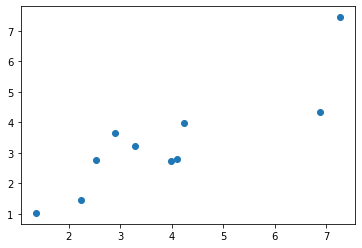

In [173]:
plt.scatter(A,S)